***Product Recommendation System Part I***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
#Loading the dataset

amazon_ratings = pd.read_csv('../Sample Datasets/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
amazon_ratings.shape

(2023070, 4)

In [4]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending = False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

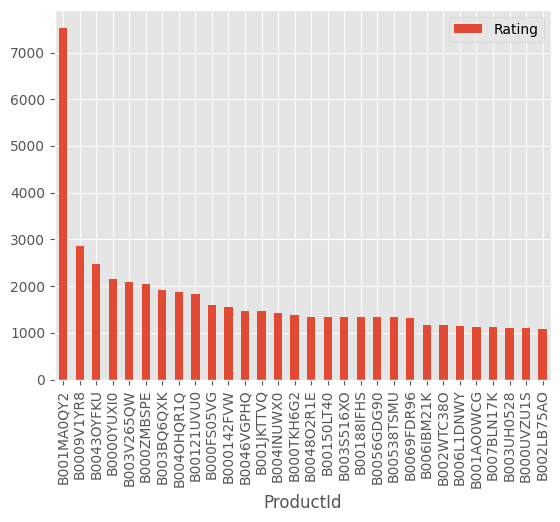

In [5]:
most_popular.head(30).plot(kind = "bar")

***Recommendation System Part II***

In [9]:
amazon_ratings1 = amazon_ratings.head(10000)
amazon_ratings1.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [10]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values = 'Rating', index = 'UserId', columns = 'ProductId', fill_value = 0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ratings_utility_matrix.shape

(9697, 886)

In [13]:
#Transpoxing the matrix
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.shape

(886, 9697)

In [18]:
X1 = X
X1.shape

(886, 9697)

In [16]:
#Decomposing the Matrix
SVD = TruncatedSVD(n_components = 10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [17]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [19]:
#Ramdomly Choose 1 ProductID
X.index[99]

'6117036094'

In [23]:
i = '6117036094'
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [24]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [25]:
#Recommending top 10 highly correlated products in sequence
Recommend = list(X.index[correlation_product_ID > 0.90])
Recommend.remove(i)
Recommend[0:9] #Here are the top 10 products to be displayed by the recommendation system

['0762451459',
 '130414089X',
 '1457982633',
 '4057362843',
 '4057362886',
 '535795545X',
 '5357955905',
 '5357955972',
 '5357956111']

***Recommendation System Part III***

#dataset: Home Depot's dataset with product dataset

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [27]:
product_descriptions = pd.read_csv("../Sample Datasets/product_descriptions.csv")
product_descriptions.shape

(124428, 2)

In [28]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [29]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape

(124428, 2)

In [30]:
product_descriptions1 = product_descriptions.head(500)
product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [31]:
#feature extraction from product descriptions
vectorizer = TfidfVectorizer(stop_words = 'english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

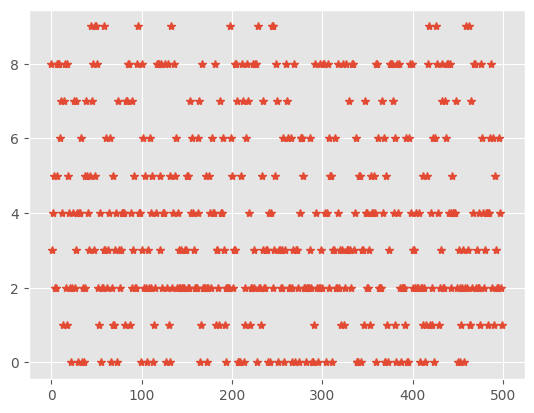

In [34]:
X = X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, "*")
plt.show()

In [35]:
def print_cluster(i):
    print("Cluster %d: " % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print

In [38]:
#Top words in each cluster based on product description
true_k = 10
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit(X1)

print("Top terms per cluster")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster
Cluster 0: 
 air
 ft
 easy
 use
 unit
 window
 power
 installation
 control
 provides
Cluster 1: 
 post
 rug
 outdoor
 vary
 100
 resistant
 product
 landscape
 ft
 patio
Cluster 2: 
 cycle
 oven
 cooking
 steam
 cu
 wash
 ft
 drying
 drum
 clothes
Cluster 3: 
 paint
 tape
 wood
 roller
 painting
 azek
 water
 film
 surfaces
 insulation
Cluster 4: 
 toilet
 water
 piece
 flush
 bowl
 design
 tank
 tile
 lifetime
 high
Cluster 5: 
 painted
 proposition
 nbsp
 residents
 moulding
 california
 65
 wood
 used
 home
Cluster 6: 
 watering
 easy
 water
 shower
 plants
 head
 handle
 cutting
 design
 use
Cluster 7: 
 light
 watt
 led
 volt
 power
 bulb
 fixture
 lighting
 switch
 bulbs
Cluster 8: 
 cabinet
 pull
 32
 nickel
 center
 style
 storage
 shelves
 easy
 room
Cluster 9: 
 wall
 plate
 posts
 connect
 fence
 speaker
 panels
 wire
 steel
 non


In [40]:
#predicting clusters based on key search words
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [41]:
show_recommendations("cutting tool")

Cluster 6: 
 watering
 easy
 water
 shower
 plants
 head
 handle
 cutting
 design
 use


In [42]:
show_recommendations("spray paint")

Cluster 3: 
 paint
 tape
 wood
 roller
 painting
 azek
 water
 film
 surfaces
 insulation


In [43]:
show_recommendations("steel drill")

Cluster 0: 
 air
 ft
 easy
 use
 unit
 window
 power
 installation
 control
 provides


In [44]:
show_recommendations("water")

Cluster 4: 
 toilet
 water
 piece
 flush
 bowl
 design
 tank
 tile
 lifetime
 high
